# CITS4403: Computational Modelling - Corona Virus Outbreak 
## Datasets from Kaggle: https://www.kaggle.com/kimjihoo/coronavirusdataset
### Jayden Kur 21988713,  Roarke Holland 21742366, Andrew Ha 22246801

This notebook aims to graphically display different trends and statistics of COVID-19 in South Korea. Data is first downloaded from the kaggle link and then parse to a usable format. Through out the notebook there is different graphs and outputs found through data analysis, such as summing age groups, genders and deaths. The network becomes larger after the newest version of the csv file has been downloaded.

The notebook is split into two sections, section one is analysing PatientInfo.csv for various trends, section two is analysing PatientRoute.csv to find different location patterns.

At the end of the notebook there is the inclusion of an extract of code which was unused in the final version as it proved too confusing and not appropriate for our project.

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

Please download the latest version of PatientInfo.csv and PatientRoute.csv from the link at the top of the notebook

In [29]:
import pandas as pd
new_file = "PatientInfo.csv" # Last Updated 19th April
df = pd.read_csv(new_file, usecols = ['patient_id','sex','age','city','confirmed_date','state'])

## Data Processing

In [30]:
df.head()

,patient_id,sex,age,city,confirmed_date,state
0,1000000001,male,50s,Gangseo-gu,2020-01-23,released
1,1000000002,male,30s,Jungnang-gu,2020-01-30,released
2,1000000003,male,50s,Jongno-gu,2020-01-30,released
3,1000000004,male,20s,Mapo-gu,2020-01-30,released
4,1000000005,female,20s,Seongbuk-gu,2020-01-31,released


In [31]:
# Use patient_id as the index
df = df.set_index('patient_id')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 1000000001 to 7000000013
Data columns (total 5 columns):
sex               3260 non-null object
age               3252 non-null object
city              3247 non-null object
confirmed_date    3323 non-null object
state             3326 non-null object
dtypes: object(5)
memory usage: 155.9+ KB


In [33]:
# Drop any row with null value
df = df.dropna(how='any',axis=0)

# Drop any row with 'city' = etc
df = df[~df.city.str.contains("etc")]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 1000000001 to 7000000013
Data columns (total 5 columns):
sex               3119 non-null object
age               3119 non-null object
city              3119 non-null object
confirmed_date    3119 non-null object
state             3119 non-null object
dtypes: object(5)
memory usage: 146.2+ KB


In [35]:
unique_cities = df.city.unique() # Get all unique cities from dataframe

In [36]:
len(df.city.unique()) # Total cities

148

In [37]:
unique_cities.sort() # Sort alphabetically

In [38]:
unique_cities

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongducheon-si', 'Dongjak-gu', 'Dongnae-gu',
       'Eumseong-gun', 'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu',
       'Ganghwa-gun', 'Gangnam-gu', 'Gangneung-si', 'Gangseo-gu',
       'Gapyeong-gun', 'Geochang-gun', 'Geoje-si', 'Geumcheon-gu',
       'Geumjeong-gu', 'Gijang-gun', 'Gimcheon-si', 'Gimhae-si',
       'Gimje-si', 'Gimpo-si', 'Goesan-gun', 'Goryeong-gun',
       'Goseong-gun', 'Goyang-si', 'Gumi-si', 'Gunpo-si', 'Gunsan-si',
       'Guri-si', 'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu',
       'Gwangju-si', 'Gwangmyeong-si', 'Gwangyang

In [39]:
df.confirmed_date.unique() # Display unique dates

array(['2020-01-23', '2020-01-30', '2020-01-31', '2020-02-05',
       '2020-02-06', '2020-02-16', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-26',
       '2020-02-24', '2020-02-25', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-03-03', '2020-04-06', '2020-04-07', '2020-04-14',
       '2020-04-15', '2020-04-18', '2020-02-18', '2020-04-09',
       '2020-04-10', '2020-04-12', '2020-04-13', '2020-

In [40]:
#df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%d/%m/%y').dt.strftime('%m%d') # Use this for old version

In [41]:
# Convert the confirmed dates to an easier to use string format
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%Y-%m-%d').dt.strftime('%m%d') # Use this to convert new versions of csv to correct string dates

In [42]:
df.head() # Check data

,sex,age,city,confirmed_date,state
patient_id,,,,,
1000000001,male,50s,Gangseo-gu,0123,released
1000000002,male,30s,Jungnang-gu,0130,released
1000000003,male,50s,Jongno-gu,0130,released
1000000004,male,20s,Mapo-gu,0130,released
1000000005,female,20s,Seongbuk-gu,0131,released


In [43]:
unique_dates = df['confirmed_date'].unique() # get unique dates
unique_dates_list = list(unique_dates)
unique_dates_list.sort() # sort dates 

In [44]:
len(unique_dates_list)

74

## Graph Design and Population

Can change the string below to format dates

In [45]:
# Can change the string to change when the values are calculated for
# latest = '0230'
# df = df[df['confirmed_date'] < latest] 

In [54]:
# Creates the graph with cities as well as various graphical display variables
def populate_graph(df):
    graph = nx.Graph()
    for city in unique_cities:
        graph.add_node(city)
    node_names = df['city'].value_counts().index.to_list() # makes city names into a list
    node_sizes = df['city'].value_counts().to_list() # counts number of times a city is in dataframe (to count cases)
    labels = {}
    for name,size in zip(node_names,node_sizes):
        labels[name] = name+ '\n' +str(size)  # Labels for each node include the name and size (number of cases)
    node_size = [20*node_sizes[ii] for ii in range(len(node_names))] # Used list comprehension to create node_sizes*20 (for displaying better)
    return graph,node_names,node_sizes,node_size,labels

In [55]:
graph,node_names,node_sizes,node_size,labels = populate_graph(df) # create graph and add cities
pos = nx.random_layout(graph) # use a random layout for the first time 

In [48]:
# Used to draw all the graphs for displaying cases/gender/deaths
def draw_graph_coloured(graph,pos,node_names,node_size,labels,gender=False,deaths=False):   
    plt.figure(1,figsize=(20,20)) # create a large plot
    if(gender == True): # if function is called with gender=True
        # Uses list comprehension to determine colour of nodes based on counts of Females or Males per city
        node_colours = ["hotpink" if graph.nodes[cities]['Females'] > graph.nodes[cities]['Males'] else "blue" 
                       for cities in graph.nodes]
        # Uses list comprehension to determine size of nodes based on counts of Females or Males per city
        node_size = [30*graph.nodes[cities]['Females'] if graph.nodes[cities]['Females'] > graph.nodes[cities]['Males'] 
                     else 30*graph.nodes[cities]['Males'] for cities in graph.nodes] # uses 30 * size for displaying better
        labels = {}
        for name,size in zip(graph.nodes,node_size):
            if (size == 0):
                labels[name] = ''
            else:
                labels[name] = name + '\n' +str(int(size/30)) # Display name of city and count of males/females
        text = 'Males and Females' # Create title text
        nx.draw(graph,pos,nodelist=graph.nodes,node_size=node_size,node_color=node_colours,labels=labels,with_labels=True)
    elif(deaths == True): # if function is called with deaths
        node_size = [100*graph.nodes[cities]['Deaths'] for cities in graph.nodes]
        labels = {}
        for cities,size in zip(graph.nodes,node_size):
            if (size == 0):
                labels[cities] = ''
            else:
                labels[cities] = cities + '\n' +str(int(size/100)) # Displays the name of city and number of deaths
        nx.draw(graph,pos,nodelist=graph.nodes,node_size=node_size,node_color='gray',labels=labels,with_labels=True,label='HELLO')
        text = 'Deaths'
    else: # Default to draw graph with red nodes and total case count as text
        node_size = [20 * graph.nodes[cities]['Cases'] for cities in graph.nodes]
        nx.draw(graph,pos,nodelist=graph.nodes,node_size=node_size,node_color='red',labels=labels,with_labels=True)
        text = 'Cases'
    plt.title(text, fontsize=30, fontfamily='serif',fontweight='roman') # adds title text to plot
    plt.axis('equal')
    plt.show()

In [49]:
# Add the cases to each node
def get_cases(node_names,node_sizes,graph):
    for ii in range(len(node_names)):
        attrs = {node_names[ii]: {'Cases': node_sizes[ii]}} # add attributes 
        nx.set_node_attributes(graph, attrs)
    return graph

In [50]:
graph = get_cases(node_names,node_sizes,graph) # update graph with cases

### Graph of Current Cases Per City at Latest Date

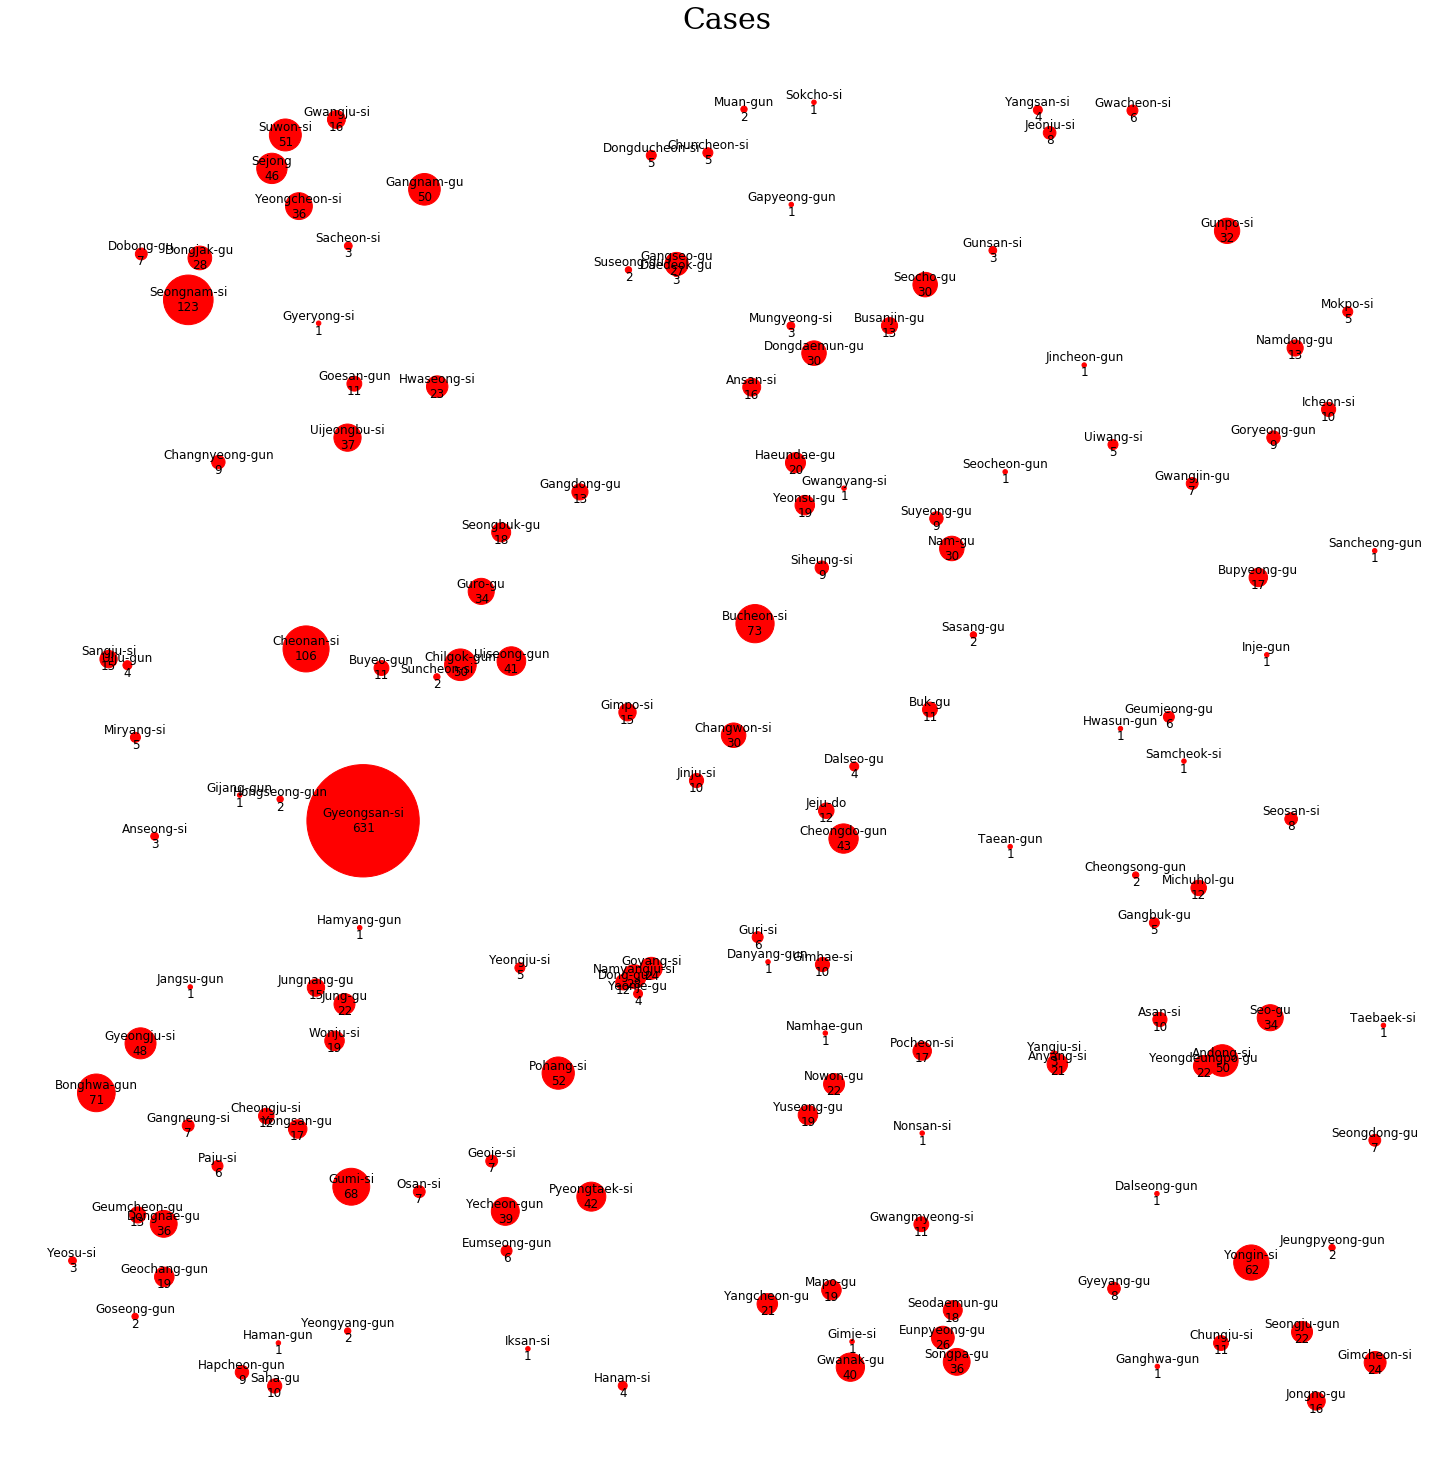

In [51]:
# Draw a graph with all cases of each city in red
draw_graph_coloured(graph,pos,node_names,node_size,labels)

In [25]:
graph.nodes['Gyeongsan-si']['Cases'] # Check data structure

631

In [26]:
# Add the deaths to each node
def get_deaths(new_df):
    death_df = new_df['state'].sort_index() # sort by states
    for ii in range(len(death_df)):
        index_city =  death_df.index[ii]
        # uses try-except to account for empty fields
        try:
            deaths = death_df[index_city].value_counts()['deceased'] # count deceased
        except:
            deaths = 0 
        attrs = {index_city: {'Deaths': deaths}} # add attributes 
        nx.set_node_attributes(graph, attrs)
    return graph

In [27]:
new_df = df.set_index('city') # using city as index

In [28]:
graph = get_deaths(new_df) # update for deaths
print(graph.nodes['Gyeongsan-si']) # Check data structure

{'Cases': 631, 'Deaths': 26}


### Graph of Deaths Per City at Latest Date

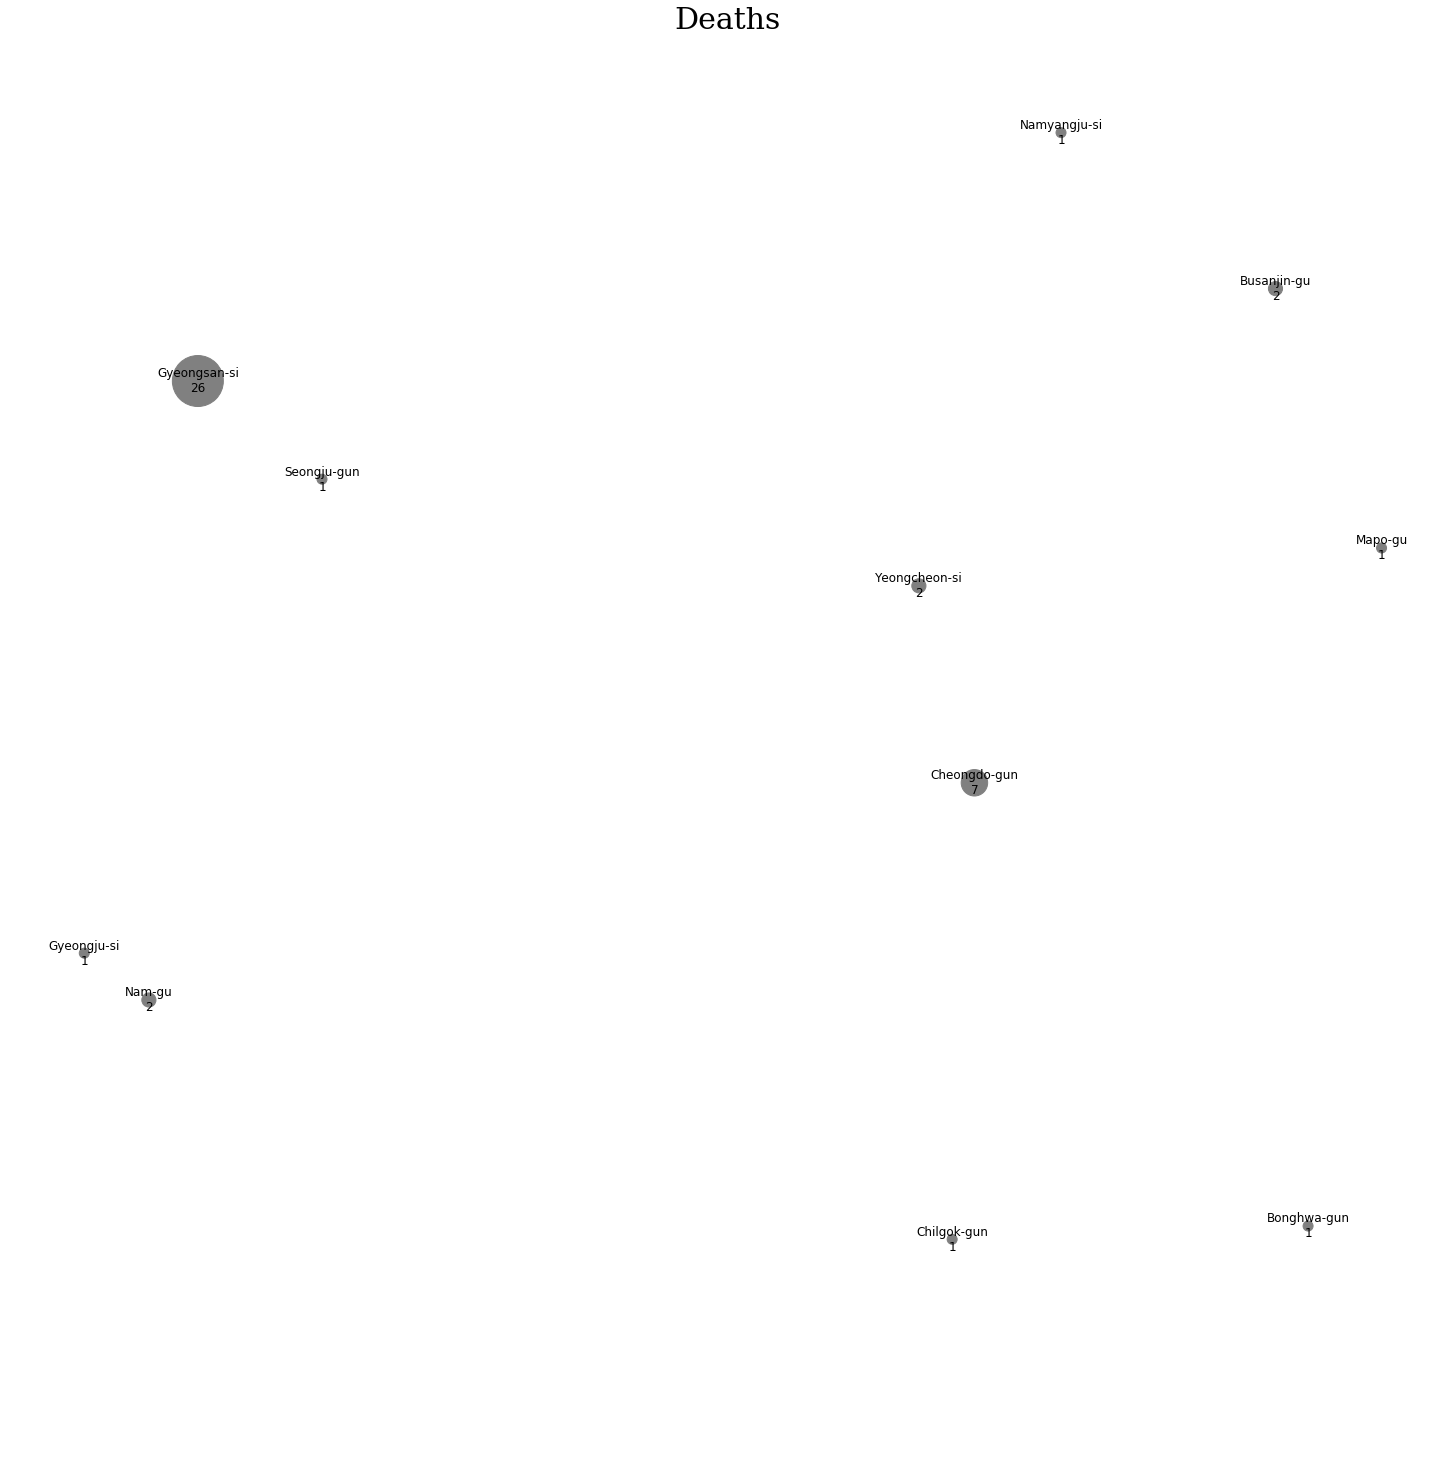

In [29]:
# Used to display deaths by city (if they have deaths)
draw_graph_coloured(graph,pos,node_names,node_size,labels,deaths=True)

In [30]:
# Add male and female to the graph
def get_gender(new_df):
    new_sort_df = new_df['sex'].sort_index() # sorted by sex (gender)
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        # uses try-except to account for empty fields
        try:
            males = new_sort_df[index_city].value_counts()['male'] # coutns males
        except:
            males = 0
        try:
            females = new_sort_df[index_city].value_counts()['female'] # counts females
        except:
            females = 0
        attrs = {index_city: {'Males': males, 'Females': females}} # adds attributes
        nx.set_node_attributes(graph, attrs)
    return graph

In [31]:
graph = get_gender(new_df) # Updates the graph
print(graph.nodes['Gyeongsan-si'])

{'Cases': 631, 'Deaths': 26, 'Males': 209, 'Females': 422}


### Graph of Males and Females Per City at Latest Date

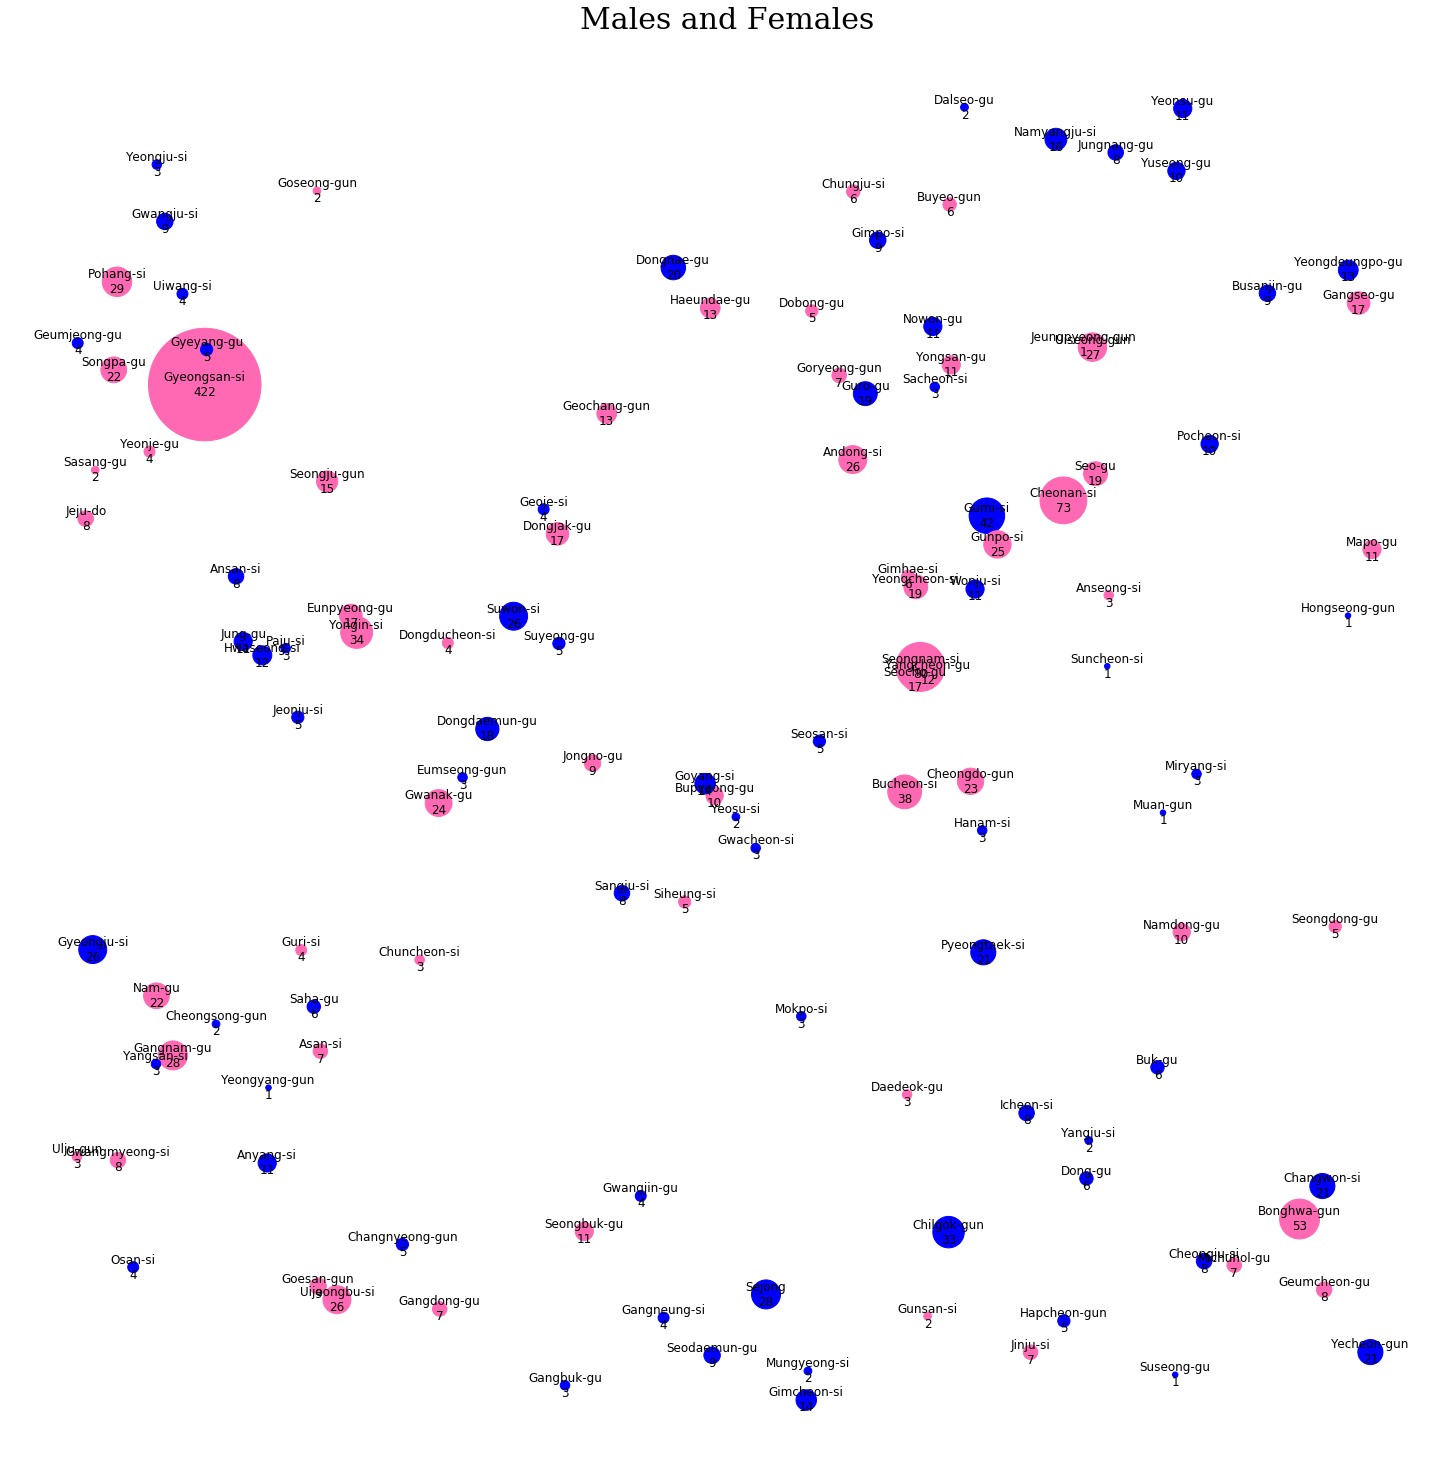

In [32]:
# Used to display male and females with the majority count having its respective colour 
draw_graph_coloured(graph,pos,node_names,node_size,labels,gender=True) 

In [33]:
# Add age groups to each node as attributes
def get_age_groups(new_df):
    new_sort_df = new_df['age'].sort_index()
    # takes time to iterate over each field
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        # use try-except to account for empty fields
        try:
            zeroes = new_sort_df[index_city].value_counts()['0s'] # adds count of 0s
        except:
            zeroes = 0 # if none found use 0 
        try:
            tens = new_sort_df[index_city].value_counts()['10s'] 
        except:
            tens = 0
        try:
            twenties = new_sort_df[index_city].value_counts()['20s']
        except:
            twenties = 0
        try:
            thirties = new_sort_df[index_city].value_counts()['30s']
        except:
            thirties = 0
        try:
            fourties = new_sort_df[index_city].value_counts()['40s']
        except:
            fourties = 0
        try:
            fifties = new_sort_df[index_city].value_counts()['50s']
        except:
            fifties = 0
        try:
            sixties = new_sort_df[index_city].value_counts()['60s']
        except:
            sixties = 0
        try:
            seventies = new_sort_df[index_city].value_counts()['70s']
        except:
            seventies = 0
        try:
            eighties = new_sort_df[index_city].value_counts()['80s']
        except:
            eighties = 0
        try:
            nineties = new_sort_df[index_city].value_counts()['90s']
        except:
            nineties = 0
        attrs = {index_city: {'Age Groups': {'0s':zeroes,'10s':tens,'20s':twenties,'30s':thirties,'40s':fourties,'50s':fifties,'60s':sixties,'70s':seventies,'80s':eighties,'90s':nineties}}} # Update attributes
        nx.set_node_attributes(graph, attrs)
    return graph

In [ ]:
graph = get_age_groups(new_df) # Update graph with age groups
print(graph.nodes['Gyeongsan-si']['Age Groups']['10s']) # Displaying data structure
print(graph.nodes['Jungnang-gu'])

### Creating GIF Display of Growing Number of Cases

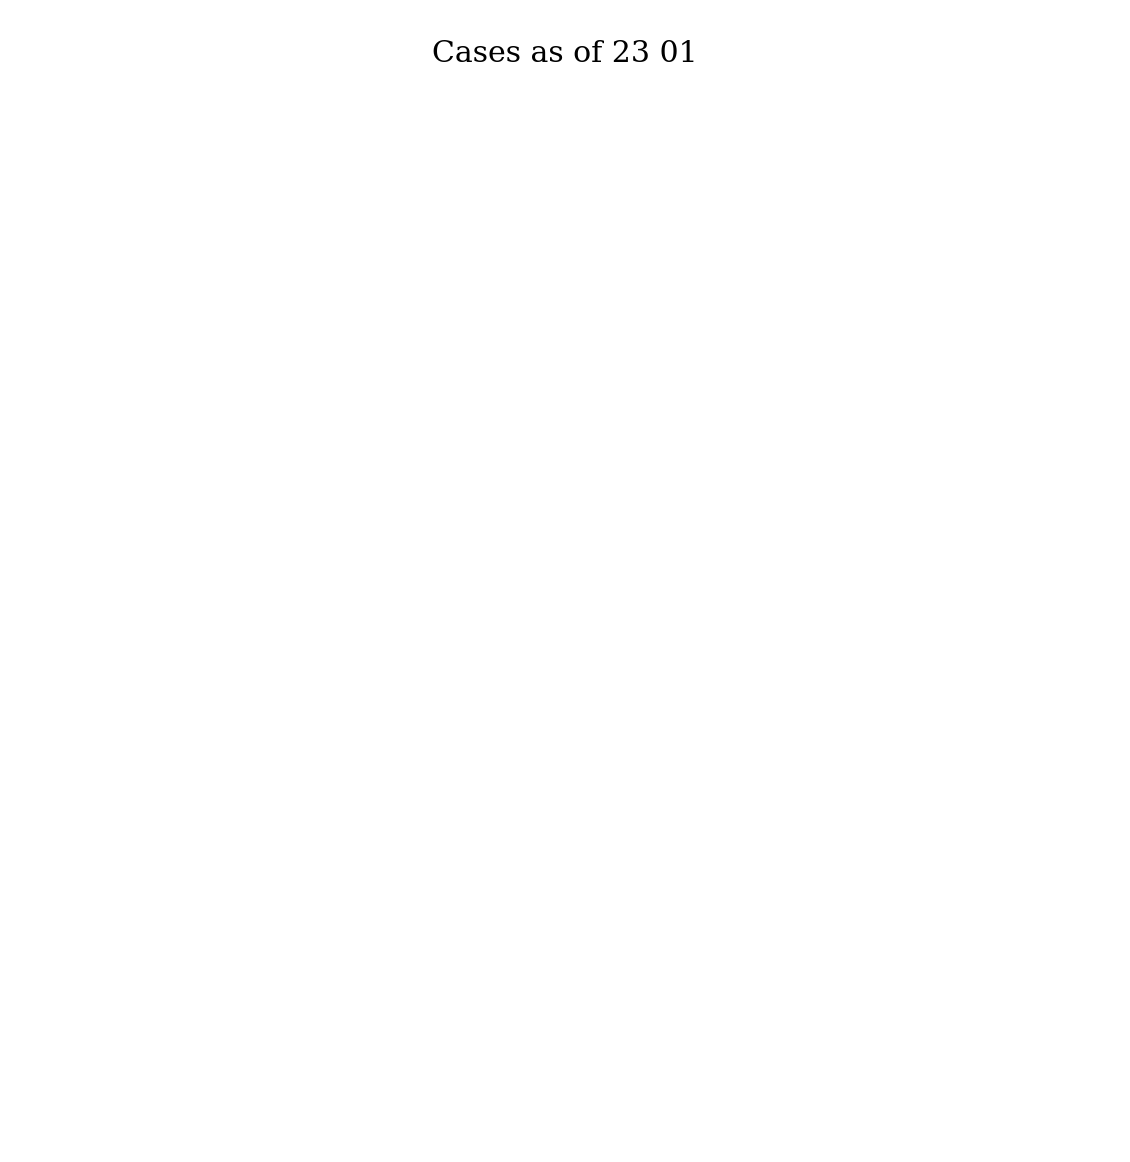

In [458]:
from matplotlib.animation import FuncAnimation # import for animation

date_list = unique_dates_list # Uses every unique date for the animation

# Called each frame to create animation 
def animate(i): 
    fig.clf() # Clears the axis each time
    ax = fig.add_subplot(111) # Add subplot for title
    new_df = df.set_index('confirmed_date') # Set index at confirmed date
    new_df = new_df[new_df.index < date_list[i]] # Runs graph creation process at each date
    text = '\nCases as of ' + date_list[i][2:4] + ' '+ date_list[i][0:2] # Makes text dynamic with dates
    graph,node_names,node_sizes,node_size,labels = populate_graph(new_df) # Create graph
    nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True) # Draw graph
    ax.set_title(text, fontsize=30, fontfamily='serif',fontweight='roman') # Adds title with dynamic date
    
fig = plt.figure(1,figsize=(20,20)) # Create figure with large plot

anim = FuncAnimation(fig, animate, frames=len(date_list), interval=400, repeat=True) # Create animation with a date for each frame
anim.save('covid.gif', writer='imagemagick') # Save gif for later use

In [ ]:
# Displays the created GIF file in the current directory 
from IPython.display import Image
Image("covid.gif")

## Data Outputs and Plots

In [ ]:
# Prints each city, their total cases and a percentage of overall cases
def city_printer(total_cases,graph):
    print('Cases by City:\n')
    for cities in graph.nodes:
        cases = graph.nodes[cities]['Cases']
        if(len(str(cities)) > 13): # Fixes bad printing
            tab = '\t'
        else:
            tab = '\t\t'
        print(str(cities)+':',tab,cases,('\t\t{0:.3%}').format(cases/total_cases),'of total cases') # formats display

In [ ]:
def age_group_printer(graph):    
    ages = ['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s']
    ages_name = ['Zeroes:','Tens:','Twenties:','Thirties:','Fourties:','Fifties:','Sixties:','Seventies:','Eighties:','Nineties:']
    age_tally = [0 for j in range(10)]
    for age_group in range(len(ages)):
        for cities in graph.nodes:
            age_tally[age_group] += graph.nodes[cities]['Age Groups'][ages[age_group]]
    sum = np.sum(age_tally)
    print('\nCases by Age:\n')
    for age_group in range(len(ages)):
        print("{0:12} \t {1} \t {2:.3%} of total cases".format(ages_name[age_group], age_tally[age_group],age_tally[age_group]/sum ))

In [ ]:
# Prints the amount of males and females 
def gender_printer(total_cases,graph):
    males=females=0 # initialize
    for cities in graph.nodes: # iterate over all cities
        males += graph.nodes[cities]['Males'] # sum up all males
        females += graph.nodes[cities]['Females'] # sum up all females
    print('\nCases by Gender:\n')
    # format string for males and females
    print('Males:\t\t',males,('\t\t{0:.3%}').format(males/total_cases),'of total cases',
          '\nFemales:\t',females,('\t\t{0:.3%}').format(females/total_cases),'of total cases')

In [ ]:
total_cases = len(df) # Get total number of cases

### Cases per City and Percentage of Overall Cases

In [ ]:
city_printer(total_cases,graph) # Calls function to print all cases by city

### Cases per Age Group and Percentage of Overall Cases

In [349]:
age_group_printer(graph) # Calls function to print all cases by age group


Cases by Age:

Zeroes:      	 50 	 1.616% of total cases
Tens:        	 140 	 4.523% of total cases
Twenties:    	 757 	 24.459% of total cases
Thirties:    	 400 	 12.924% of total cases
Fourties:    	 426 	 13.764% of total cases
Fifties:     	 570 	 18.417% of total cases
Sixties:     	 381 	 12.310% of total cases
Seventies:   	 182 	 5.880% of total cases
Eighties:    	 146 	 4.717% of total cases
Nineties:    	 43 	 1.389% of total cases


### Cases per Gender and Percentage of Overall Cases

In [350]:
gender_printer(total_cases,graph) # Calls function to print all cases by gender


Cases by Gender:

Males:		 1342 		43.027% of total cases 
Females:	 1754 		56.236% of total cases


In [351]:
# Alters dataframe based on a certain confirmation date of infection
def choose_dates(df,date):
    df_new = df[df['confirmed_date'] < date] # change dataframe to before 'date'
    graph,node_names,node_sizes,node_size,labels = populate_graph(df_new) # Create graph 
    graph = get_cases(node_names,node_sizes,graph) # Get the cases per city
    return graph,df_new

In [352]:
# Used for displaying the day difference between the dates
def date_difference(date_low,date_high):
    date_diff = 0
    month = 30
    month_high = (int((int(date_high))/100))
    month_low = (int((int(date_low))/100))
    day_high = (int(date_high)%100)
    day_low = (int(date_low)%100)
    if((month_high-month_low) == 1): # 1 month difference
        date_diff = day_high + month - day_low
    elif((month_high-month_low) == 2): # 2 month difference
        date_diff = day_high + month*2 - day_low
    elif((month_high-month_low) == 3): # 3 month difference
        date_diff = day_high + month*3 - day_low
    elif((month_high-month_low) == 4): # 4 month difference
        date_diff = day_high + month*4 - day_low
    elif((month_high-month_low) == 5): # 5 month difference
        date_diff = day_high + month*5 - day_low
    elif((month_high-month_low) == 6): # 6 month difference
        date_diff = day_high + month*6 - day_low
    return date_diff

In [353]:
# Prints out average growth per day within a defined window of dates
def ave_growth_per_day(g,g_2,date_low,date_high):
    date_diff = date_difference(date_low,date_high) # Get difference of dates 
    print('Case growth per day from',date_low,'to',date_high,'('+str(date_diff),'days)\n') # Print title and date difference
    max_cases = 0 # max cases
    max_city = '' # max cases city
    temp = 0 # temp for max values
    cases_list = list() # new list for case counting
    for cities in g.nodes:
        # Use try-except to account for empty fields
        try:
            cases = g.nodes[cities]['Cases'] # Get cases in first graph
        except:
            cases = 0
        try:
            cases_2 = g_2.nodes[cities]['Cases'] # Get cases in second graph
        except:
            cases_2 = 0
        sub_cases = cases - cases_2 # Difference between two cases
        temp = sub_cases  
        cases_list.insert(0,[sub_cases/date_diff,cities]) # add the change of cases to cases_list
        # used to find max cases
        if (temp > max_cases): 
            max_cases = temp
            max_city = cities
            temp = 0
        if(len(str(cities)) > 13): # Fixes bad printing
            tab = '\t'
        else:
            tab = '\t\t'
        print(cities+':',tab,('{0:.3}').format(sub_cases/date_diff)) # Prints formatted cities and cases
    print('\nMax daily growth of',('{0:.3}').format(max_cases/date_diff),'at',max_city) # Prints max daily growth city
    return sorted(cases_list,reverse=True) # return a sorted cases_list with case and city

In [359]:
latest_date = unique_dates_list[-1] # gets the last date of a recorded case
date_low = '0123'  # choose a early date to calculate from
#date_high = '0230' # use a defined later date to calculate from
date_high = latest_date # use latest date
graph_low,df_low = choose_dates(df,date_low) # Create a graph at the earlier date
graph_high,df_high = choose_dates(df,date_high) # Create a graph at the later date

### Growth of Cases per day at each City

In [361]:
cases_list = ave_growth_per_day(graph_high,graph_low,date_low,date_high) # Call function to print cases growth per day

Case growth per day from 0123 to 0419 (86 days)

Andong-si: 		 0.581
Ansan-si: 		 0.186
Anseong-si: 		 0.0349
Anyang-si: 		 0.244
Asan-si: 		 0.116
Bonghwa-gun: 		 0.826
Bucheon-si: 		 0.849
Buk-gu: 		 0.128
Bupyeong-gu: 		 0.198
Busanjin-gu: 		 0.151
Buyeo-gun: 		 0.128
Changnyeong-gun: 	 0.105
Changwon-si: 		 0.349
Cheonan-si: 		 1.23
Cheongdo-gun: 		 0.5
Cheongju-si: 		 0.14
Cheongsong-gun: 	 0.0233
Chilgok-gun: 		 0.581
Chuncheon-si: 		 0.0581
Chungju-si: 		 0.128
Daedeok-gu: 		 0.0349
Dalseo-gu: 		 0.0465
Dalseong-gun: 		 0.0116
Danyang-gun: 		 0.0116
Dobong-gu: 		 0.0814
Dong-gu: 		 0.14
Dongdaemun-gu: 		 0.349
Dongducheon-si: 	 0.0581
Dongjak-gu: 		 0.326
Dongnae-gu: 		 0.419
Eumseong-gun: 		 0.0698
Eunpyeong-gu: 		 0.302
Gangbuk-gu: 		 0.0581
Gangdong-gu: 		 0.151
Ganghwa-gun: 		 0.0116
Gangnam-gu: 		 0.581
Gangneung-si: 		 0.0814
Gangseo-gu: 		 0.314
Gapyeong-gun: 		 0.0116
Geochang-gun: 		 0.221
Geoje-si: 		 0.0814
Geumcheon-gu: 		 0.151
Geumjeong-gu: 		 0.0698
Gijang-gun: 		

In [362]:
# Draws the top X amount of increases in growth per X cities
def draw_top_growers(top,cases_list,date_low,date_high):
    cases_temp = cases_list[0:top] # up to top limit
    cases = [case[0] for case in cases_temp] # Get case count
    cities = [city[1] for city in cases_temp] # Get city name
    y_pos = np.arange(len(cities)) # Arrange y pos with length of cities list
    fig, ax = plt.subplots(figsize=(top+5,top+5)) # Create figure that changes based on 'top' value
    plt.bar(y_pos, cases) # Use bar graph
    plt.xticks(y_pos, cities) 
    ax.set(xlabel='Cities', ylabel='New Cases/Day',
           title='Top '+str(top)+' Daily Growth from '+date_low+' to '+date_high) # Update axis with dynamic title
    plt.show()

### Plot Showing the Top Daily Growths in Cases per City 

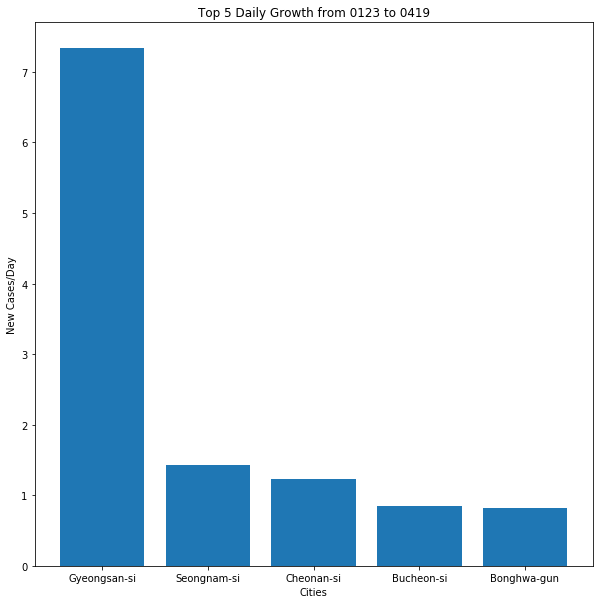

In [363]:
draw_top_growers(5,cases_list,date_low,date_high) # Can change the first input to change the "top" amount

In [364]:
# Gets the cases per city at a point of time
def city_cases(df,date_list,city):
    city_case = list()
    for date in date_list: # iterate over every date
        date_1,df_new = choose_dates(df,date) # create graph at date
        # Use try-except to account for empty fields
        try:
            cases = date_1.nodes[city]['Cases']
        except:
            cases = 0
        city_case.insert(0,cases) # Add the cases to list at that date
    return sorted(city_case,reverse=False) # return city_case list 

In [365]:
# Plot the cases over a list of dates 
def plot_time_cases(df,date_list,city):
    city_case = city_cases(df,date_list,city) # get the cases at the dates given
    dates = date_list # x axis values
    cases = city_case  # y axis values

    fig, ax = plt.subplots(figsize=(20,12)) # Create plot 
    ax.plot(dates, cases) # plot the dates and total cases
    plt.xticks(rotation=45) # 
    ax.set(xlabel='Dates', ylabel='Cases',
           title='Cases by Date: '+city) # Adds title and labels
    if(len(dates) > 12): # If many dates then remove every third
        ax.xaxis.set_major_locator(plt.MaxNLocator(int(len(dates)/3))) # Fixes tick interval for neater presentation
    plt.show()

### Plot Showing the Cases per City over Time

In [382]:
date_list = unique_dates_list

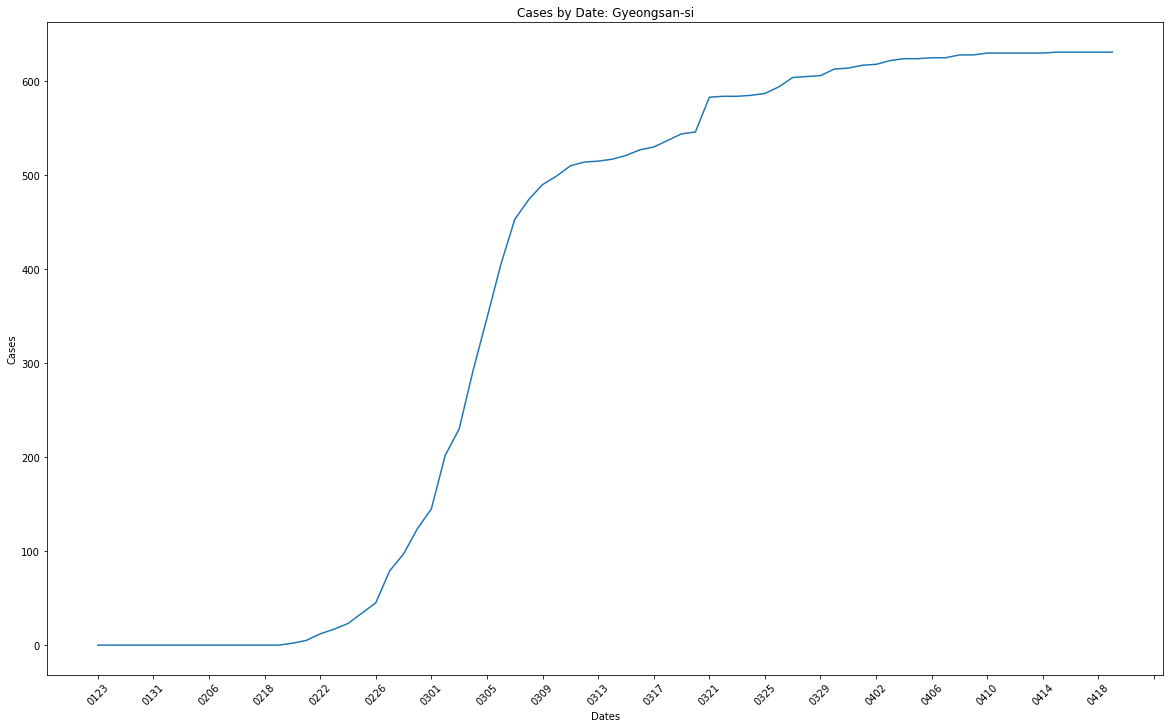

In [384]:
city = 'Gyeongsan-si' # choose a city
plot_time_cases(df,date_list,city) # Plots the cases over time at the city chosen

In [367]:
# Gets the deaths at each different date used
def death_cases(df,date_list):
    death_case = list() # list to store deaths
    for date in date_list: # iterate over dates
        date_2,df_new = choose_dates(df,date) # create graph at defined date
        df_new = df_new.set_index('city') # set index as city
        date_2 = get_deaths(df_new) # call get_deaths function to add attributes to graph
        deaths = 0 # initialize
        for cities in graph.nodes:  # iterate over cities
            deaths += date_2.nodes[cities]['Deaths'] # sums deaths at each city
        death_case.insert(0,deaths) # add total deaths at that date
    return sorted(death_case,reverse=False) # return list

In [368]:
# Plot the cummulative deaths at each date
def plot_deaths(df,date_list):
    death_case = death_cases(df,date_list) # get total deaths per date
    dates = date_list # x values
    deaths = death_case  # y values
    fig, ax = plt.subplots(figsize=(20,12)) # create figure plot
    ax.plot(dates, deaths) # plto deaths and dates
    plt.xticks(rotation=45) # Rotate x ticks 
    ax.set(xlabel='Dates', ylabel='Deaths',
           title='Deaths by Date') # Adds title and labels
    if(len(dates) > 12): # If many dates then remove every third
        ax.xaxis.set_major_locator(plt.MaxNLocator(int(len(dates)/3))) # Fixes tick interval for neater presentation
    plt.show()

### Plot Showing the Total Deaths over Time

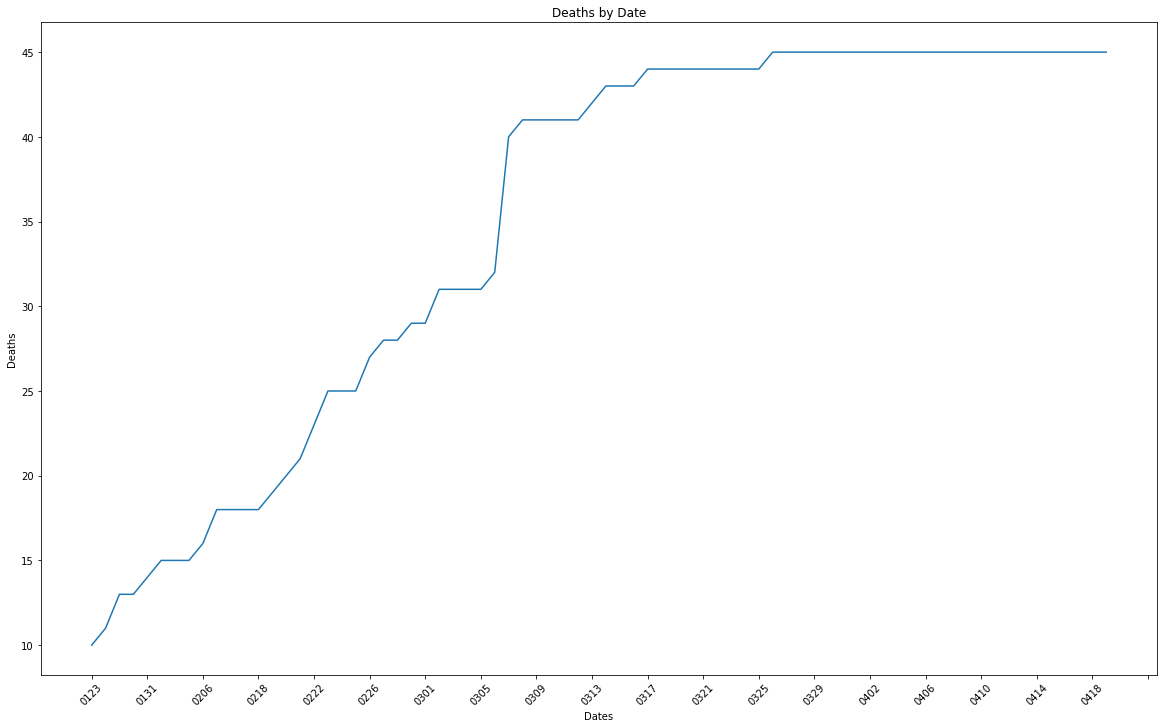

In [383]:
plot_deaths(df,date_list) # This takes quite a while to work out deaths per date

## The following is for using the second file, PatientRoute.csv

### Data Processing

In [370]:
df_2 = pd.read_csv("PatientRoute.csv", usecols = ['patient_id','city','type'])

In [371]:
df_2.head()

,patient_id,city,type
0,1000000001,Gimpo-si,airport
1,1000000001,Jung-gu,hospital
2,1000000002,Seongbuk-gu,etc
3,1000000002,Seongbuk-gu,store
4,1000000002,Seongdong-gu,public_transportation


In [372]:
#Use patient_id as the index
df_2 = df_2.set_index('patient_id')

In [373]:
df_2.head()

,city,type
patient_id,,
1000000001,Gimpo-si,airport
1000000001,Jung-gu,hospital
1000000002,Seongbuk-gu,etc
1000000002,Seongbuk-gu,store
1000000002,Seongdong-gu,public_transportation


In [374]:
# Drop any row with null value
df_2 = df_2.dropna(how='any',axis=0)
# Drop any row with 'city' = etc
df_2 = df_2[~df_2.city.str.contains("etc")]
# Drop any row with 'type' = etc
df_2 = df_2[~df_2.type.str.contains("etc")]

In [375]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4186 entries, 1000000001 to 6100000090
Data columns (total 2 columns):
city    4186 non-null object
type    4186 non-null object
dtypes: object(2)
memory usage: 98.1+ KB


In [376]:
df_2 = df_2.set_index('city') # set index as city
df_2 = df_2.sort_index() # sort the index

In [377]:
df_2.head() # check the dataframe

,type
city,
Andong-si,store
Andong-si,restaurant
Andong-si,store
Andong-si,restaurant
Andong-si,restaurant


In [378]:
unique_cities_2 = df_2.index.unique() # get unique cities
unique_cities_2_list = list(unique_cities_2) # convert to list
unique_cities_2_list.sort() # sort cities

### Displaying Total of Visited Location Types

In [379]:
# Counts the amount of types in each city
def count_types(df_2,city_list):
    print('Most Common Places for Infected Patients to Visit')
    # iterate all cities in dataframe
    for city in city_list:
        df_temp = df_2 # make temp dataframe
        df_temp = df_temp[df_temp.index.str.contains(city)] # only use one city at a time
        contact_points = df_temp.type.value_counts() # count all types
        total = sum(contact_points)
        print('\n'+city)
        print(total,' total locations\n')
        print(contact_points) # Print types with city       
        print('\n')

### Overall Types

In [380]:
contact_points = df_2.type.value_counts() # Counts each type in the dataframe
print('Total Most Common Places for Infected Patients to Visit\n')
print(contact_points) # Print the output 

Total Most Common Places for Infected Patients to Visit

hospital                       1790
store                           545
restaurant                      489
public_transportation           412
pharmacy                        215
airport                         189
church                          135
cafe                             93
school                           52
pc_cafe                          46
lodging                          37
bank                             30
bakery                           24
gym                              20
real_estate_agency               16
post_office                      15
university                       14
beauty_salon                     14
administrative_area_level_1      14
bar                              13
gas_station                      12
academy                          11
Name: type, dtype: int64


### Types By City

In [381]:
count_types(df_2,unique_cities_2_list) # Counts the types in each city

Most Common Places for Infected Patients to Visit

Andong-si
27  total locations

restaurant                     9
school                         6
store                          5
church                         2
public_transportation          1
administrative_area_level_1    1
cafe                           1
hospital                       1
bakery                         1
Name: type, dtype: int64



Ansan-si
2  total locations

restaurant               1
public_transportation    1
Name: type, dtype: int64



Anseong-si
2  total locations

hospital    2
Name: type, dtype: int64



Anyang-si
3  total locations

restaurant    2
hospital      1
Name: type, dtype: int64



Asan-si
36  total locations

restaurant               12
store                     8
hospital                  6
public_transportation     4
pharmacy                  4
university                1
school                    1
Name: type, dtype: int64



Bonghwa-gun
1  total locations

hospital    1
Name: type, dtype: i


Guro-gu
146  total locations

hospital                 46
public_transportation    34
church                   31
restaurant               15
store                    13
pharmacy                  4
gym                       1
airport                   1
cafe                      1
Name: type, dtype: int64



Gurye-gun
1  total locations

restaurant    1
Name: type, dtype: int64



Gwacheon-si
3  total locations

church                   2
public_transportation    1
Name: type, dtype: int64



Gwanak-gu
115  total locations

hospital                 36
store                    21
restaurant               16
public_transportation    14
pharmacy                  8
cafe                      7
school                    5
bar                       2
gym                       1
bank                      1
beauty_salon              1
pc_cafe                   1
post_office               1
bakery                    1
Name: type, dtype: int64



Gwangjin-gu
19  total locations

hospital        

Seodaemun-gu
49  total locations

hospital                 24
store                     6
restaurant                5
public_transportation     5
pharmacy                  4
bank                      3
post_office               1
pc_cafe                   1
Name: type, dtype: int64



Seongbuk-gu
33  total locations

hospital                 13
restaurant                8
pharmacy                  7
store                     4
public_transportation     1
Name: type, dtype: int64



Seongdong-gu
21  total locations

hospital                 9
public_transportation    8
restaurant               2
store                    2
Name: type, dtype: int64



Seongnam-si
14  total locations

hospital      10
restaurant     1
church         1
bank           1
store          1
Name: type, dtype: int64



Seosan-si
30  total locations

store          12
hospital        7
restaurant      4
pharmacy        4
gas_station     1
cafe            1
bar             1
Name: type, dtype: int64



Siheung-si
9